# Experiments on the student performance dataset

geospatial shift


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

import warnings

warnings.filterwarnings('ignore')
from utilexp import *
from expnns.preprocessor import Preprocessor
from utilstudent import *

In [2]:
X1, y1, X1_train, X1_test, y1_train, y1_test, X2, y2, preprocessor = load_dataset()

# Train and observe model changes

In [ ]:
# Randomdised search + 5-fold cross validation (default)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(learning_rate='adaptive', random_state=0)

# parameters
#max_iter_vals = [int(i) for i in np.linspace(1000, 10000, 10)]
hidden_layer_sizes_vals = [(i) for i in list(range(20, 100, 4))]
batch_size_vals = [8, 16, 32, 64]
learning_rate_init_vals = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05]

#distributions = dict(max_iter=max_iter_vals, hidden_layer_sizes=hidden_layer_sizes_vals)
distributions = dict(hidden_layer_sizes=hidden_layer_sizes_vals,
                     batch_size=batch_size_vals,
                     learning_rate_init=learning_rate_init_vals)
                     #max_iter=max_iter_vals, )

#nns = RandomizedSearchCV(nn, distributions, scoring='accuracy')
#search = nns.fit(X1, y1)
#print(search.best_params_)


In [35]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(learning_rate='adaptive', hidden_layer_sizes=8, learning_rate_init=0.02, batch_size=32, random_state=0, max_iter=5)

# 5-fold cross validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, f1_score, precision_score

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(clf, X1, y1, scoring=scoring)
for name in list(scores.keys()):
    if name == 'fit_time' or name == 'score_time':
        continue
    print("%0.2f %s with a std of %0.2f" % (scores[name].mean(), name, scores[name].std()))

clf = MLPClassifier(learning_rate='adaptive', hidden_layer_sizes=8, learning_rate_init=0.02, batch_size=32, random_state=0, max_iter=5)

clf.fit(X1_train, y1_train)
resres = clf.predict(X1_test.values)
print('\n', classification_report(y1_test, resres, target_names=[f'bad credit (0)', f'good credit (1)'], digits=3))
resres = clf.predict(X1.values)
print('\n', classification_report(y1, resres, target_names=[f'bad credit (0)', f'good credit (1)'], digits=3))


0.73 test_accuracy with a std of 0.06
0.74 test_precision_macro with a std of 0.09
0.68 test_recall_macro with a std of 0.08
0.68 test_f1_macro with a std of 0.09

                  precision    recall  f1-score   support

 bad credit (0)      0.708     0.548     0.618        31
good credit (1)      0.770     0.870     0.817        54

       accuracy                          0.753        85
      macro avg      0.739     0.709     0.718        85
   weighted avg      0.748     0.753     0.745        85


                  precision    recall  f1-score   support

 bad credit (0)      0.775     0.604     0.679       154
good credit (1)      0.798     0.899     0.846       268

       accuracy                          0.791       422
      macro avg      0.787     0.752     0.762       422
   weighted avg      0.790     0.791     0.785       422



In [22]:
resres = clf.predict(X1_test.values)
print('\n', classification_report(y1_test, resres, target_names=[f'bad credit (0)', f'good credit (1)'], digits=3))
resres = clf.predict(X1_train.values)
print('\n', classification_report(y1_train, resres, target_names=[f'bad credit (0)', f'good credit (1)'], digits=3))



                  precision    recall  f1-score   support

 bad credit (0)      0.708     0.548     0.618        31
good credit (1)      0.770     0.870     0.817        54

       accuracy                          0.753        85
      macro avg      0.739     0.709     0.718        85
   weighted avg      0.748     0.753     0.745        85


                  precision    recall  f1-score   support

 bad credit (0)      0.792     0.618     0.694       123
good credit (1)      0.805     0.907     0.853       214

       accuracy                          0.801       337
      macro avg      0.798     0.762     0.773       337
   weighted avg      0.800     0.801     0.795       337



In [37]:
# save the trained classifier
from joblib import dump, load

dump(clf, 'student.joblib')


['student.joblib']

inf-distance for weights and biases of classifiers with hidden size [40 42 44 46 48 50 52 54 56], training gap is 0.05, 
WEIGHTS or BIASES inf-distance /// % of D2 used


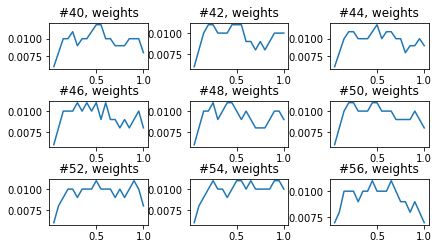

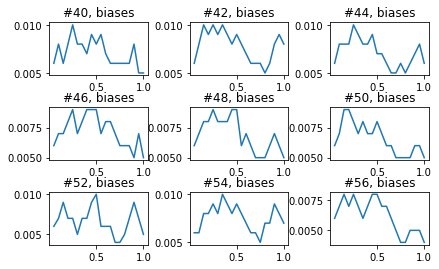

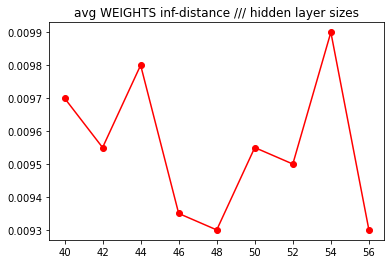

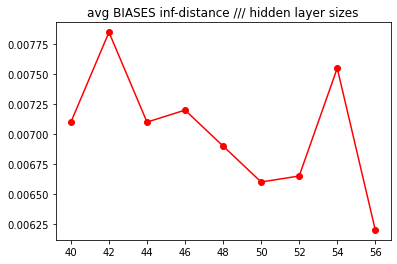

In [40]:
# inf-distance for weights and biases of classifiers with hidden size [ 4  6  8 10 12 14 16 18 20]
# training gap is 0.05

train_gap = 0.05
h_hidden_size = np.arange(40, 57, 2)
lr = 0.002
batch_size = 16
max_iter = 7000
avg_w_dists_wrt_sizes, avg_b_dists_wrt_sizes = plot_incremental_training_weight_bias_changes(train_gap, h_hidden_size,
                                                                                             lr, batch_size, max_iter,
                                                                                             X1, y1, X2, y2,
                                                                                             False)

inf-distance for weights and biases of classifiers with hidden size [40 42 44 46 48 50 52 54 56], training gap is 0.02, 
WEIGHTS or BIASES inf-distance /// % of D2 used


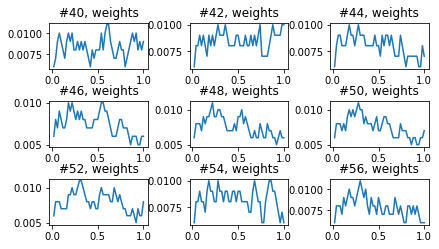

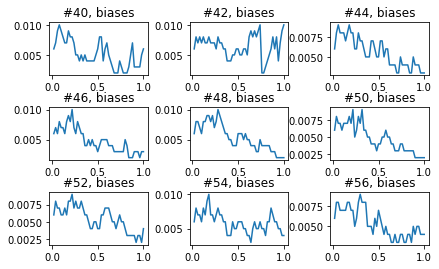

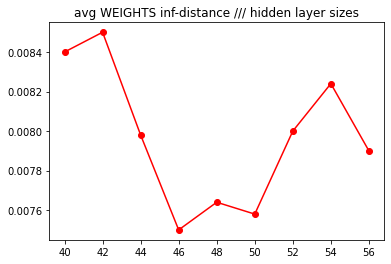

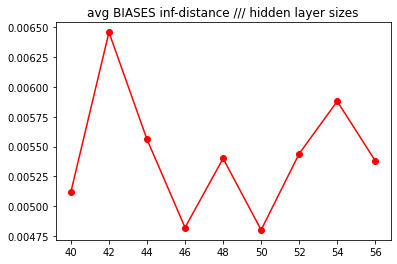

inf-distance for weights and biases of classifiers with hidden size [40 42 44 46 48 50 52 54 56], training gap is 0.05, 
WEIGHTS or BIASES inf-distance /// % of D2 used


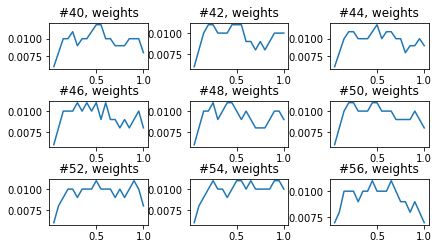

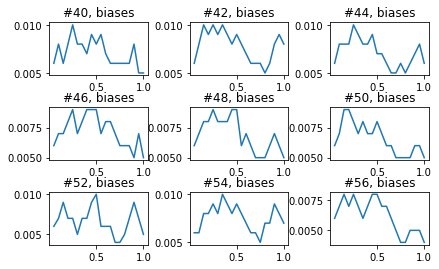

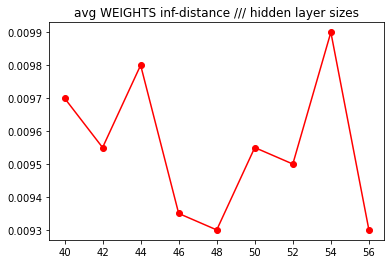

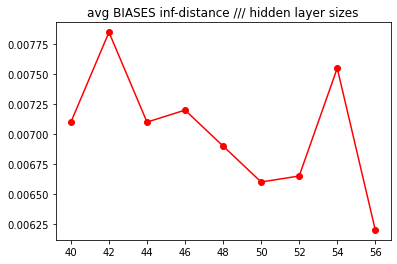

inf-distance for weights and biases of classifiers with hidden size [40 42 44 46 48 50 52 54 56], training gap is 0.1, 
WEIGHTS or BIASES inf-distance /// % of D2 used


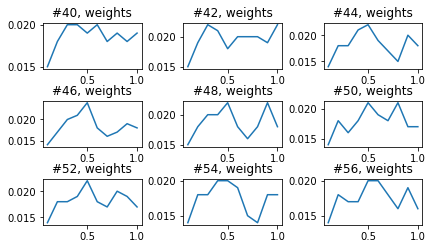

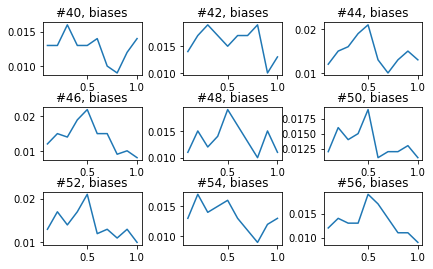

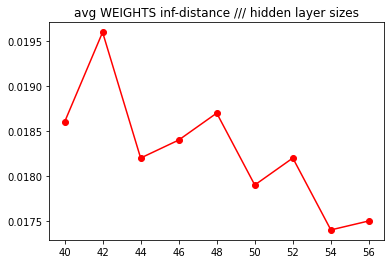

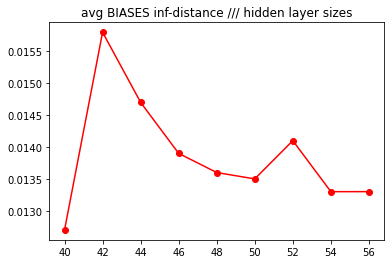

inf-distance for weights and biases of classifiers with hidden size [40 42 44 46 48 50 52 54 56], training gap is 0.2, 
WEIGHTS or BIASES inf-distance /// % of D2 used


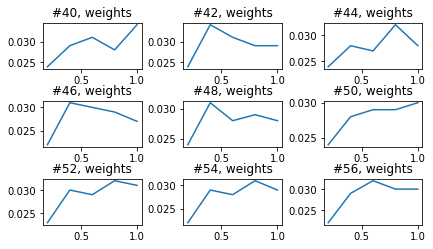

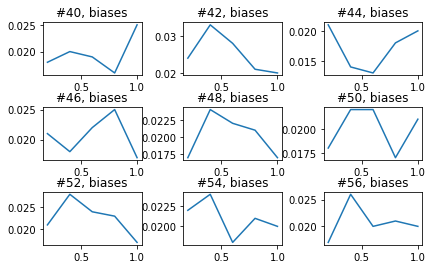

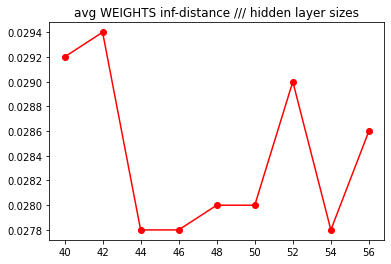

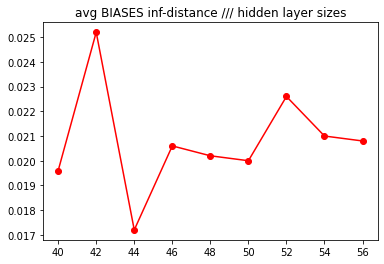

inf-distance for weights and biases of classifiers with hidden size [40 42 44 46 48 50 52 54 56], training gap is 0.25, 
WEIGHTS or BIASES inf-distance /// % of D2 used


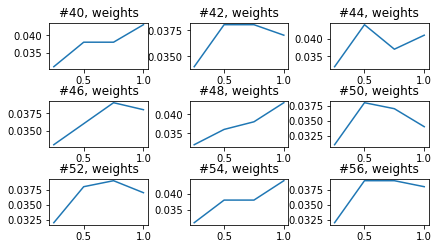

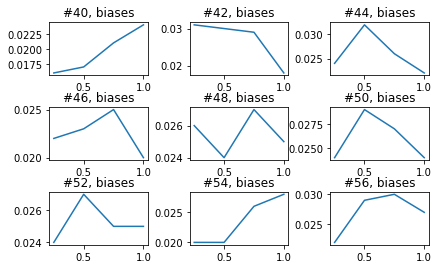

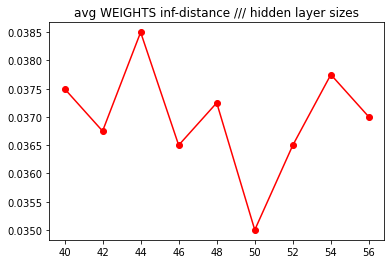

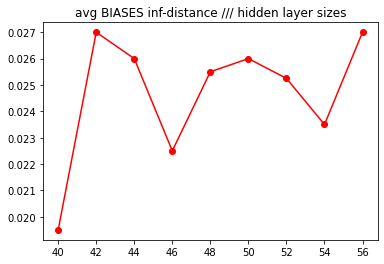

In [41]:
# inf-distance for weights and biases of classifiers with hidden size [ 4  6  8 10 12 14 16 18 20]
# training gap is [0.02, 0.05, 0.10, 0.20]

train_gaps = [0.02, 0.05, 0.10, 0.20, 0.25]
h_hidden_size = np.arange(40, 57, 2)
lr = 0.002
batch_size = 16
max_iter = 7000
avg_w_dists_wrt_gaps = []
avg_b_dists_wrt_gaps = []
for gap in train_gaps:
    thisw, thisb = plot_incremental_training_weight_bias_changes(gap, h_hidden_size,
                                                                 lr, batch_size, max_iter,
                                                                 X1, y1, X2, y2)
    avg_w_dists_wrt_gaps.append(thisw)
    avg_b_dists_wrt_gaps.append(thisb)

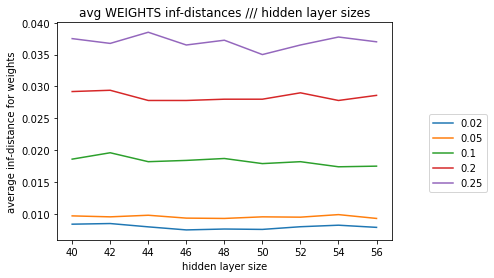

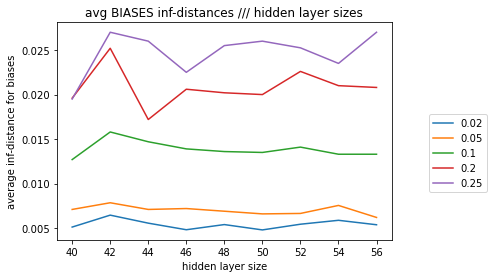

In [42]:
plt.figure(5)
plt.xlabel("hidden layer size")
plt.ylabel("average inf-distance for weights")
for i, item in enumerate(avg_w_dists_wrt_gaps):
    plt.plot(h_hidden_size, item, label=f"{train_gaps[i]}")
plt.legend(bbox_to_anchor=(1.3, 0.6))
plt.title('avg WEIGHTS inf-distances /// hidden layer sizes')

plt.figure(6)
plt.xlabel("hidden layer size")
plt.ylabel("average inf-distance for biases")
for i, item in enumerate(avg_b_dists_wrt_gaps):
    plt.plot(h_hidden_size, item, label=f"{train_gaps[i]}")
plt.legend(bbox_to_anchor=(1.3, 0.6))
plt.title('avg BIASES inf-distances /// hidden layer sizes')
plt.show()

# Experiments: computing counterfactuals

#### Procedures

These procedures are covered by UtilExp class

1. Train M on D1
2. Get delta-min, build M+ and M-: incrementally train M 5 times, using different 10% of D2 each time, then get the maximum inf-distance between the incremented models and M. Construct M+ and M- using delta-min
3. Get M2: incrementally train M on D2
4. Select test instances: randomly select 50 D1 instances to explain, clf(x)=0, desired class=1
5. Report metrics using each baseline

#### Metrics
- Proximity: normalised L1: "Scaling Guarantees for Nearest CEs" page 7
- Sparsity: L0
- Validity-delta: percentage of test instances that 1) have counterfactuals valid on m1, 2) counterfactuals valid on M+ and M- under delta_min
- Validity-m2: percentage of test instances that 1) have counterfactual(s), 2) these counterfactual(s) are all valid on both m1 and m2
- LOF: average LOF score

In [3]:
from joblib import dump, load
import gurobipy
clf = load("student.joblib")
gurobipy.setParam("FeasibilityTol", 1e-09)
gurobipy.setParam("OptimalityTol", 1e-09)
gurobipy.setParam("IntFeasTol", 1e-05)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-14
Set parameter FeasibilityTol to value 1e-09
Set parameter OptimalityTol to value 1e-09


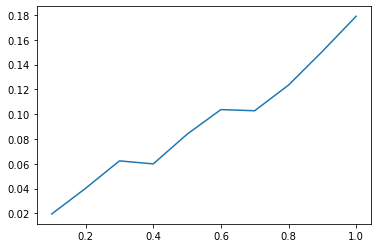

In [4]:
gaps = np.arange(0.1, 1.01, 0.1)
deltas = []
clfs = []
for a, i in enumerate(gaps):
    clfs.append(copy.deepcopy(clf))
    util_exp = UtilExp(clfs[a], X1, y1, X2, y2, columns, ordinal_features, discrete_features, continuous_features, preprocessor.feature_var_map,
                   num_test_instances=1000, gap=i)
    deltas.append(util_exp.delta_min)
plt.plot(gaps, deltas)

In [9]:
util_exp = UtilExp(clf, X1, y1, X2, y2, columns, ordinal_features, discrete_features, continuous_features, preprocessor.feature_var_map, gap=0.14, num_test_instances=1000)
print(util_exp.delta_max)
print(util_exp.delta_min)

0.15318456033183359
0.018555392179078534


In [10]:
print(len(X1.values) - np.sum(clf.predict(X1)))

120.0


In [11]:
valids = util_exp.verify_soundness()
print(len(valids))

percentage of sound model changes: 0.4
48


In [12]:
valids = util_exp.verify_soundness(update_test_instances=True)
valids2 = util_exp.verify_soundness()   # percentage should be 1
print(len(valids))

percentage of sound model changes: 0.4
test instances updated to sound (x, Delta) pairs, length: 48
percentage of sound model changes: 1.0
48


In [13]:
# OURS-ROBUST
ours_robust_ces = util_exp.run_ours_robust()
util_exp.evaluate_ces(ours_robust_ces)

48it [00:36,  1.31it/s]


total computation time in s: 36.52399730682373
found: 1.0
average normalised L1: 0.0904448475113659
average normalised L0: 0.20095833333333332
average lof score: 1.0
counterfactual validity: 1.0
delta validity: 1.0
m2 validity: 1.0


In [13]:
# OURS-NON-ROBUST
ours_non_robust_ces = util_exp.run_ours_non_robust()
util_exp.evaluate_ces(ours_non_robust_ces)

5it [00:00, 20.57it/s]


total computation time in s: 0.24602746963500977
found: 1.0
average normalised L1: 0.04032843308270677
average normalised L0: 0.1032
average lof score: 1.0
counterfactual validity: 1.0
delta validity: 0.0
m2 validity: 0.2


In [14]:
# ROAR
roar_ces = util_exp.run_ROAR(labels=(1,))
util_exp.evaluate_ces(roar_ces)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  3.13it/s]

0it [00:00, ?it/s]
1it [00:00,  3.28it/s]

0it [00:00, ?it/s]
1it [00:00,  3.51it/s]

0it [00:00, ?it/s]
1it [00:00,  3.28it/s]

0it [00:00, ?it/s]
1it [00:00,  3.14it/s]

0it [00:00, ?it/s]
1it [00:00,  3.47it/s]

0it [00:00, ?it/s]
1it [00:00,  3.64it/s]

0it [00:00, ?it/s]
1it [00:00,  4.48it/s]

0it [00:00, ?it/s]
1it [00:00,  4.81it/s]

0it [00:00, ?it/s]
1it [00:00,  6.17it/s]

0it [00:00, ?it/s]
1it [00:00,  5.35it/s]

0it [00:00, ?it/s]
1it [00:00,  5.85it/s]

0it [00:00, ?it/s]
1it [00:00,  5.92it/s]

0it [00:00, ?it/s]
1it [00:00,  6.13it/s]

0it [00:00, ?it/s]
1it [00:00,  7.04it/s]

0it [00:00, ?it/s]
1it [00:00,  6.13it/s]

0it [00:00, ?it/s]
1it [00:00,  5.46it/s]

0it [00:00, ?it/s]
1it [00:00,  6.02it/s]

0it [00:00, ?it/s]
1it [00:00,  8.47it/s]

0it [00:00, ?it/s]
1it [00:00,  7.63it/s]

0it [00:00, ?it/s]
1it [00:00,  7.52it/s]

0it [00:00, ?it/s]
1it [00:00,  6.49it/s]

0it [00:00, ?it/s]
1it [00:00,  6.9

total computation time in s: 295.7290554046631
found: 1.0
counterfactual validity: 0.0
delta validity: 0.0
m2 validity: 0.0


In [15]:
for i, item in enumerate(roar_ces):
    print(util_exp.is_robust_raw(util_exp.test_instances[i], item))

(0, -4.248810469860376)
(0, -4.29681880980641)
(0, -4.159903245781578)
(0, -5.560285709170114)
(0, -4.850477715077684)


In [15]:
# ROAR-robustness-boosted
roar_ces = util_exp.run_ROAR(labels=(1,), robust=True, lamb1_mul=2)
util_exp.evaluate_ces(roar_ces)
# lamb1 *= 2, count 10

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  2.23it/s]

0it [00:00, ?it/s]
1it [00:00,  2.11it/s]

0it [00:00, ?it/s]
1it [00:00,  2.42it/s]

0it [00:00, ?it/s]
1it [00:00,  2.18it/s]

0it [00:00, ?it/s]
1it [00:00,  2.27it/s]

0it [00:00, ?it/s]
1it [00:00,  2.46it/s]

0it [00:00, ?it/s]
1it [00:00,  2.65it/s]

0it [00:00, ?it/s]
1it [00:00,  3.22it/s]

0it [00:00, ?it/s]
1it [00:00,  4.05it/s]

0it [00:00, ?it/s]
1it [00:00,  3.76it/s]

0it [00:00, ?it/s]
1it [00:00,  3.64it/s]

0it [00:00, ?it/s]
1it [00:00,  4.98it/s]
1it [00:33, 33.28s/it]
0it [00:00, ?it/s]
1it [00:00,  1.79it/s]

0it [00:00, ?it/s]
1it [00:00,  1.83it/s]

0it [00:00, ?it/s]
1it [00:00,  1.93it/s]

0it [00:00, ?it/s]
1it [00:00,  1.66it/s]

0it [00:00, ?it/s]
1it [00:00,  1.43it/s]

0it [00:00, ?it/s]
1it [00:00,  1.85it/s]

0it [00:00, ?it/s]
1it [00:00,  1.91it/s]

0it [00:00, ?it/s]
1it [00:00,  1.70it/s]

0it [00:00, ?it/s]
1it [00:00,  2.21it/s]

0it [00:00, ?it/s]
1it [00:00,  2.20it/s]

0it [00:00, ?

total computation time in s: 321.46596455574036
found: 1.0
average normalised L1: 0.07246740897968075
average normalised L0: 0.966
average lof score: 1.0
counterfactual validity: 0.1
delta validity: 0.0
m2 validity: 0.0


In [5]:
# PROTOTYPES
proto_ces = util_exp.run_proto()
util_exp.evaluate_ces(proto_ces)

No encoder specified. Using k-d trees to represent class prototypes.
10it [07:51, 47.12s/it]


total computation time in s: 471.7160007953644
found: 1.0
average normalised L1: 0.35282956098703516
average normalised L0: 0.7072
average lof score: 1.0
counterfactual validity: 1.0
delta validity: 0.0
m2 validity: 1.0


In [6]:
# PROTOTYPES-robustness-boosted
proto_ces_robust= util_exp.run_proto_robust(proto_ces)
util_exp.evaluate_ces(proto_ces_robust)

0it [00:00, ?it/s]No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
1it [02:23, 143.95s/it]No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class prototypes.
No encoder specified. Using k-d trees to represent class proto

total computation time in s: 1524.6610071659088
found: 1.0
average normalised L1: 0.4533255552214787
average normalised L0: 0.8898999999999999
average lof score: -0.4
counterfactual validity: 1.0
delta validity: 0.0
m2 validity: 1.0


In [9]:
delta = util_exp.delta_min
print(np.arange(delta / 10, delta * 1.01, delta / 10))
plot_x = np.arange(0.1, 1.01, 0.1)
print(delta)
print(plot_x)


1 0.3387056018767758
0.1068212388779291


In [ ]:
def evaluate_ces_validity_plot(test_instances, ces, target_delta=0.05):
    deltas = np.arange(target_delta / 10, target_delta * 1.01, target_delta / 10)
    delta_vals = []
    for delta in deltas:
        delta_val = 0
        nodes = build_inn_nodes(util_exp.clf, util_exp.num_layers)
        weights, biases = build_inn_weights_biases(util_exp.clf, util_exp.num_layers, delta, nodes)
        inn_delta = Inn(util_exp.num_layers, delta, nodes, weights, biases)
        for i, x in enumerate(test_instances):
            if ces[i] is None:
                continue
            y_prime = 1 if util_exp.clf.predict(x.reshape(1, -1))[0] == 0 else 0
            this_solver = OptSolver(util_exp.dataset, inn_delta, y_prime, x, mode=1, M=10000, x_prime=ces[i])
            if this_solver.compute_inn_bounds()[0] == 1:
                delta_val += 1
        delta_vals.append(delta_val / len(test_instances))
    return delta_vals

In [ ]:
delta_vals_roar = evaluate_ces_validity_plot(util_exp.test_instances, roar_ces, target_delta=util_exp.delta_min)
delta_vals_ours_non_rob = evaluate_ces_validity_plot(util_exp.test_instances, ours_non_robust_ces,
                                                     target_delta=util_exp.delta_min)
delta_vals_proto = evaluate_ces_validity_plot(util_exp.test_instances, proto_ces, target_delta=util_exp.delta_min)
plot_x = [str(i) + "*$\delta$" for i in np.round(np.arange(0.1, 1.00001, 0.1), 1)]
print(plot_x)
plot_x_num = np.round(np.arange(0.1, 1.00001, 0.1), 1)


In [ ]:
fig, ax = plt.subplots()
ax.plot(plot_x_num, delta_vals_roar, "ro-", label="ROAR")
ax.plot(plot_x_num, delta_vals_ours_non_rob, "yo-", label="MILP")
ax.plot(plot_x_num, delta_vals_proto, "go-", label="PROTO")
ax.set_xticks(np.arange(0.1, 1.01, 0.1))
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = plot_x[i]
ax.set_xticklabels(labels)
ax.grid()
ax.legend()
fig.tight_layout()
